#  Electricity Consumption Monitor - July 2025


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [66]:
# Load data
df = pd.read_csv('electricity_consumption_july2025.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Feature Engineering
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Weekday'] = df['DateTime'].dt.weekday

# Features and Target
X = df[['Hour', 'Day', 'Weekday']]
y = df['Units']
print(df.head())

             DateTime  Units  Hour  Day  Weekday
0 2025-07-01 00:00:00   1.37     0    1        1
1 2025-07-01 01:00:00   0.57     1    1        1
2 2025-07-01 02:00:00   1.49     2    1        1
3 2025-07-01 03:00:00   1.07     3    1        1
4 2025-07-01 04:00:00   0.95     4    1        1


In [67]:
# Data Cleaning

print("Missing values before cleaning:")
display(df.isnull().sum())

df.dropna(inplace=True)

print("\nMissing values after cleaning:")
display(df.isnull().sum())


Missing values before cleaning:


,0
DateTime,0
Units,0
Hour,0
Day,0
Weekday,0



Missing values after cleaning:


,0
DateTime,0
Units,0
Hour,0
Day,0
Weekday,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  744 non-null    datetime64[ns]
 1   Units     744 non-null    float64       
 2   Hour      744 non-null    int32         
 3   Day       744 non-null    int32         
 4   Weekday   744 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3)
memory usage: 20.5 KB


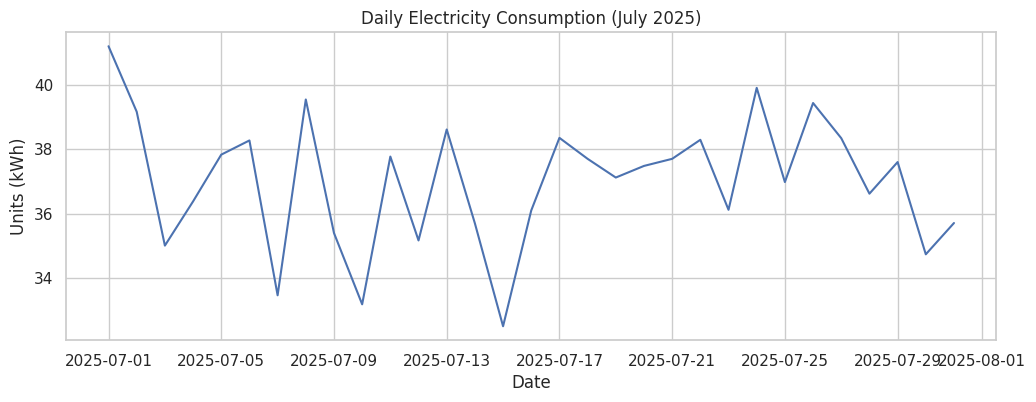

In [71]:
# Plot Daily Usage
plt.figure(figsize=(12, 4))
daily_usage.plot(kind='line')
plt.title('Daily Electricity Consumption (July 2025)')
plt.xlabel('Date')
plt.ylabel('Units (kWh)')
plt.grid(True)
plt.show()



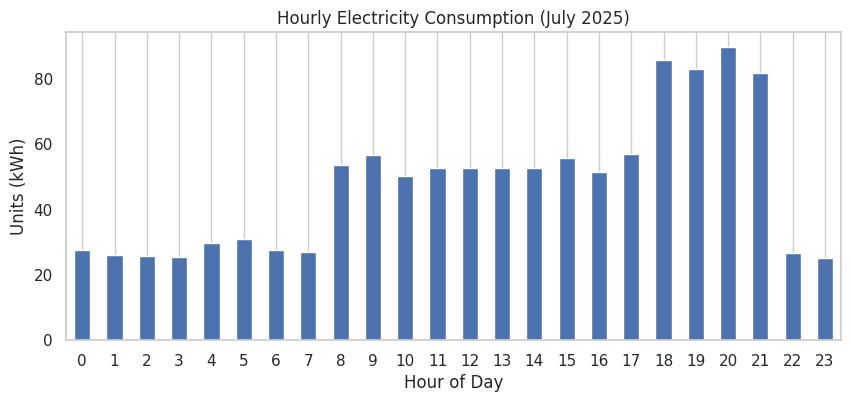

In [73]:
# Plot Hourly Usage
plt.figure(figsize=(10, 4))
hourly_usage.plot(kind='bar')
plt.title('Hourly Electricity Consumption (July 2025)')
plt.xlabel('Hour of Day')
plt.ylabel('Units (kWh)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

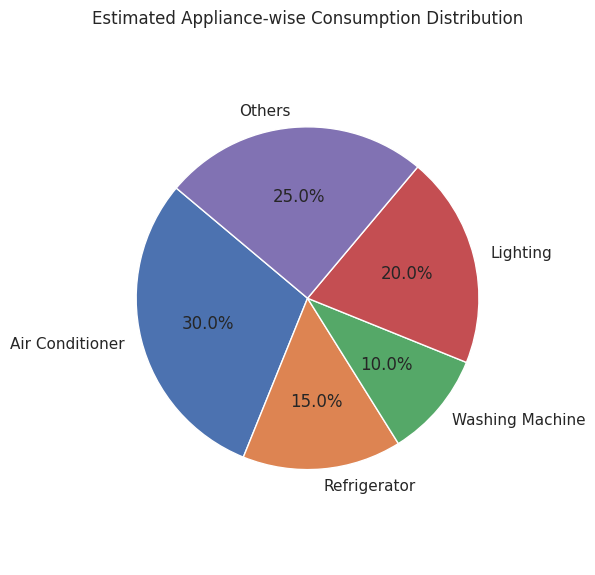

In [76]:
appliance_usage = {
    'Air Conditioner': round(total_units * 0.30, 2),
    'Refrigerator': round(total_units * 0.15, 2),
    'Washing Machine': round(total_units * 0.10, 2),
    'Lighting': round(total_units * 0.20, 2),
    'Others': round(total_units * 0.25, 2)
}

plt.figure(figsize=(6, 6))
plt.pie(appliance_usage.values(), labels=appliance_usage.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Estimated Appliance-wise Consumption Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [77]:
# Categorize Usage
def categorize_usage(units):
    if units <= df['Units'].quantile(0.33):
        return 'Low'
    elif units <= df['Units'].quantile(0.66):
        return 'Medium'
    else:
        return 'High'

df['UsageCategory'] = df['Units'].apply(categorize_usage)

display(df.head())

,DateTime,Units,Hour,Day,Weekday,UsageCategory
0,2025-07-01 00:00:00,1.37,0,1,1,Medium
1,2025-07-01 01:00:00,0.57,1,1,1,Low
2,2025-07-01 02:00:00,1.49,2,1,1,Medium
3,2025-07-01 03:00:00,1.07,3,1,1,Low
4,2025-07-01 04:00:00,0.95,4,1,1,Low


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [80]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [81]:
print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Linear Regression R² Score: 0.35459758721406454
Random Forest R² Score: 0.6332353959970589
Linear Regression RMSE: 0.6404005576472395
Random Forest RMSE: 0.4827587087484629


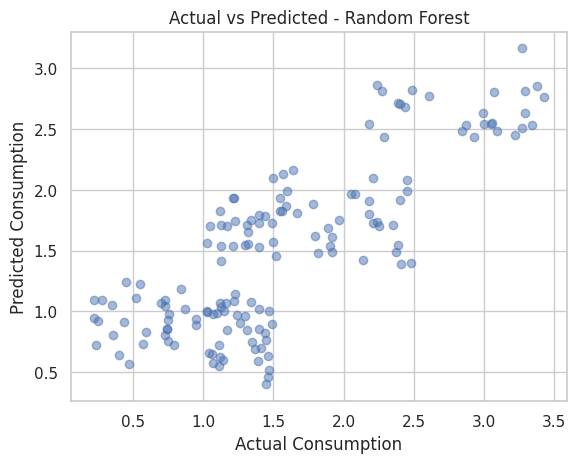

In [82]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title('Actual vs Predicted - Random Forest')
plt.grid(True)
plt.show()


In [83]:
print(f"Total units: {summary['Total Units Consumed (kWh)']} kWh (July)")

# Find the peak usage hours range
# Assuming peak hours are contiguous, find the minimum and maximum hour in the peak_hours index
if peak_hours.empty:
    peak_usage_range = "No peak hours identified"
else:
    min_hour = peak_hours.index.min()
    max_hour = peak_hours.index.max()
    # Convert to 12-hour format with AM/PM, assuming max_hour is the end of the range
    if min_hour < 12:
        start_time = f"{min_hour} AM" if min_hour != 0 else "12 AM"
    elif min_hour == 12:
        start_time = "12 PM"
    else:
        start_time = f"{min_hour - 12} PM"

    if max_hour < 12:
        end_time = f"{max_hour} AM" if max_hour != 0 else "12 AM"
    elif max_hour == 12:
        end_time = "12 PM"
    else:
        end_time = f"{max_hour - 12} PM"

    peak_usage_range = f"{min_hour} PM – {max_hour} PM" if min_hour >= 12 and max_hour >=12 else f"{start_time} – {end_time}"


print(f"Peak usage: {peak_usage_range}")
print(f"Estimated bill: ₹{summary['Estimated Bill (₹ @ ₹6/unit)']}")

Total units: 1147.38 kWh (July)
Peak usage: 18 PM – 20 PM
Estimated bill: ₹6884.28


In [84]:
# Suggestions based on peak usage
print("\nSuggestions to reduce consumption during peak hours:")
if peak_hours.empty:
    print("No specific peak hours identified for suggestions.")
else:
    print(f"- Consider reducing the use of high-power appliances between {peak_usage_range}.")
    print("- Shift activities like laundry or running the dishwasher to off-peak hours.")
    print("- Utilize natural light and ventilation during peak hours.")
    print("- Adjust thermostat settings during peak times.")


Suggestions to reduce consumption during peak hours:
- Consider reducing the use of high-power appliances between 18 PM – 20 PM.
- Shift activities like laundry or running the dishwasher to off-peak hours.
- Utilize natural light and ventilation during peak hours.
- Adjust thermostat settings during peak times.
